In [521]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import InputLayer,Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt


# On iris dataset

In [522]:
iris = load_iris()
X, y = iris.data, iris.target

In [523]:
np.unique(y)

array([0, 1, 2])

In [524]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [525]:
y[:5]

array([0, 0, 0, 0, 0])

In [526]:
X.shape

(150, 4)

In [527]:
y.shape

(150,)

In [528]:
y = to_categorical(y, 3)

In [529]:
y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [530]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [531]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [532]:
X_train.shape

(120, 4)

In [533]:
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [534]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [535]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32)


Epoch 1/100
3/3 [==============================] - 1s 65ms/step - loss: 1.1431 - accuracy: 0.2188 - val_loss: 1.0914 - val_accuracy: 0.4583
Epoch 2/100
3/3 [==============================] - 0s 12ms/step - loss: 1.1227 - accuracy: 0.2708 - val_loss: 1.0741 - val_accuracy: 0.4583
Epoch 3/100
3/3 [==============================] - 0s 12ms/step - loss: 1.1034 - accuracy: 0.2917 - val_loss: 1.0567 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 1.0829 - accuracy: 0.3750 - val_loss: 1.0387 - val_accuracy: 0.5833
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 1.0621 - accuracy: 0.5104 - val_loss: 1.0212 - val_accuracy: 0.6250
Epoch 6/100
3/3 [==============================] - 0s 12ms/step - loss: 1.0425 - accuracy: 0.6354 - val_loss: 1.0031 - val_accuracy: 0.7083
Epoch 7/100
3/3 [==============================] - 0s 12ms/step - loss: 1.0228 - accuracy: 0.6979 - val_loss: 0.9854 - val_accuracy: 0.7500
Epoch 8/100
3/3 [===

3/3 [==============================] - 0s 15ms/step - loss: 0.2607 - accuracy: 0.9167 - val_loss: 0.2565 - val_accuracy: 0.9583
Epoch 60/100
3/3 [==============================] - 0s 12ms/step - loss: 0.2563 - accuracy: 0.9167 - val_loss: 0.2532 - val_accuracy: 0.9583
Epoch 61/100
3/3 [==============================] - 0s 17ms/step - loss: 0.2525 - accuracy: 0.9167 - val_loss: 0.2510 - val_accuracy: 0.9583
Epoch 62/100
3/3 [==============================] - 0s 15ms/step - loss: 0.2476 - accuracy: 0.9271 - val_loss: 0.2479 - val_accuracy: 0.9583
Epoch 63/100
3/3 [==============================] - 0s 13ms/step - loss: 0.2436 - accuracy: 0.9271 - val_loss: 0.2450 - val_accuracy: 0.9583
Epoch 64/100
3/3 [==============================] - 0s 15ms/step - loss: 0.2394 - accuracy: 0.9271 - val_loss: 0.2422 - val_accuracy: 0.9583
Epoch 65/100
3/3 [==============================] - 0s 13ms/step - loss: 0.2356 - accuracy: 0.9271 - val_loss: 0.2402 - val_accuracy: 0.9583
Epoch 66/100
3/3 [========

In [536]:
# Evaluate the model on the training data
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Print the results
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")



Training Loss: 0.1418
Training Accuracy: 0.9417
Test Loss: 0.1011
Test Accuracy: 1.0000


1/1 [==============================] - 0s 39ms/step
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<IPython.core.display.Javascript object>

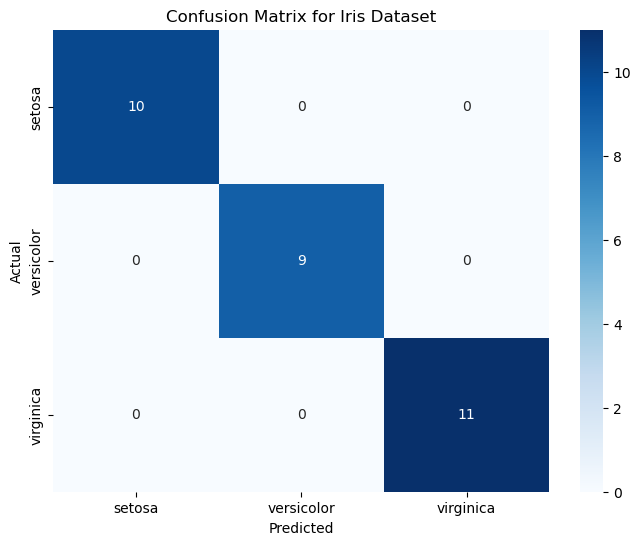

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [537]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Iris Dataset')
plt.show()
print(classification_report(y_true, y_pred, target_names=iris.target_names))


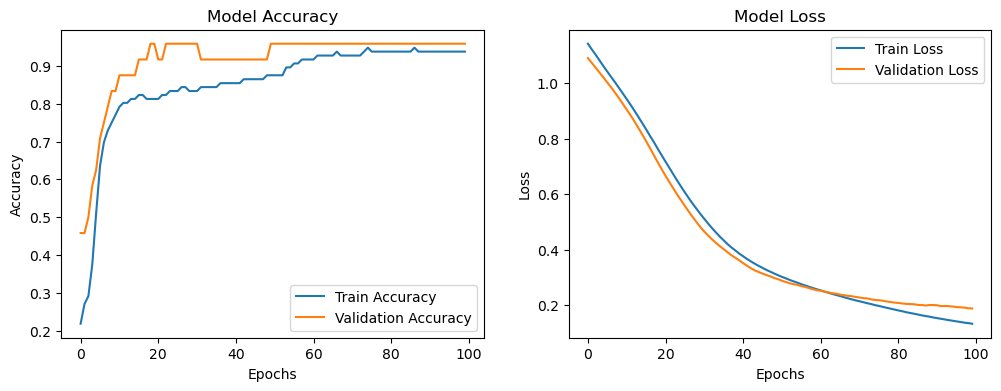

In [538]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# On Breast Cancer Dataset

In [539]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

data = load_breast_cancer()
X, y = data.data, data.target
print(X.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(X_train.shape)

(569, 30)
(455, 30)


In [540]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense
from keras.optimizers import Adam

model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [541]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=64)


Epoch 1/100
6/6 [==============================] - 1s 26ms/step - loss: 0.6387 - accuracy: 0.4945 - val_loss: 0.5863 - val_accuracy: 0.7692
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5204 - accuracy: 0.8736 - val_loss: 0.4892 - val_accuracy: 0.9121
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.4272 - accuracy: 0.9341 - val_loss: 0.4075 - val_accuracy: 0.9121
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.3497 - accuracy: 0.9368 - val_loss: 0.3384 - val_accuracy: 0.9231
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.2875 - accuracy: 0.9451 - val_loss: 0.2796 - val_accuracy: 0.9451
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.2358 - accuracy: 0.9451 - val_loss: 0.2326 - val_accuracy: 0.9560
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.1976 - accuracy: 0.9451 - val_loss: 0.1966 - val_accuracy: 0.9670
Epoch 8/100
6/6 [=========

6/6 [==============================] - 0s 6ms/step - loss: 0.0131 - accuracy: 0.9945 - val_loss: 0.0884 - val_accuracy: 0.9451
Epoch 60/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.0880 - val_accuracy: 0.9451
Epoch 61/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0884 - val_accuracy: 0.9560
Epoch 62/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0117 - accuracy: 0.9973 - val_loss: 0.0888 - val_accuracy: 0.9560
Epoch 63/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0112 - accuracy: 0.9973 - val_loss: 0.0874 - val_accuracy: 0.9560
Epoch 64/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.0876 - val_accuracy: 0.9560
Epoch 65/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.0872 - val_accuracy: 0.9560
Epoch 66/100
6/6 [===============

In [542]:
# Evaluate the model on the training data
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Print the results
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Training Loss: 0.0199
Training Accuracy: 0.9934
Test Loss: 0.0894
Test Accuracy: 0.9737


4/4 [==============================] - 0s 1ms/step
Confusion Matrix:
 [[41  2]
 [ 1 70]]


<IPython.core.display.Javascript object>

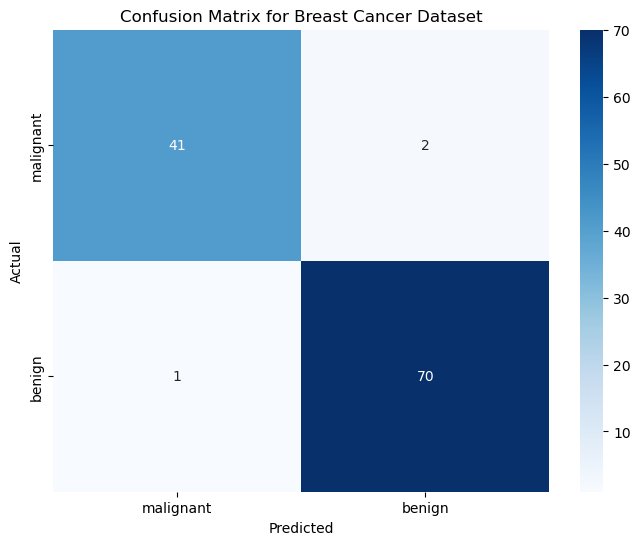

              precision    recall  f1-score   support

      Benign       0.98      0.95      0.96        43
   Malignant       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [543]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=data.target_names, 
            yticklabels=data.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Breast Cancer Dataset')
plt.show()
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))


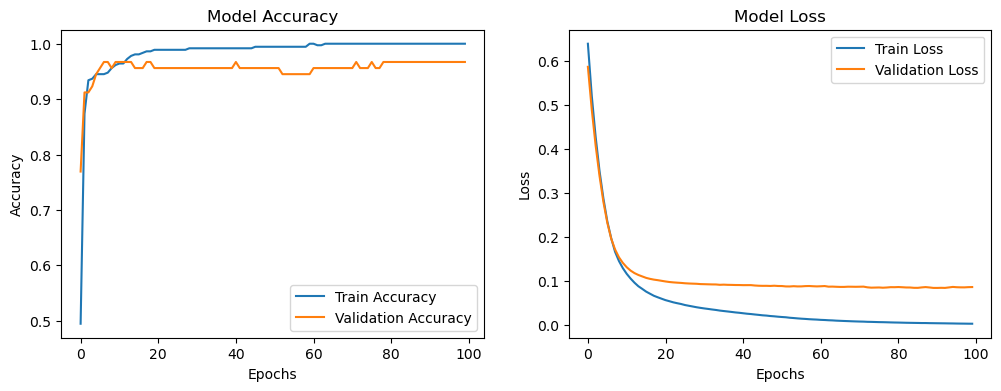

In [544]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
